----------------------------


<h1> REGRESION LINEAL GERENCIA


-----------------------

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


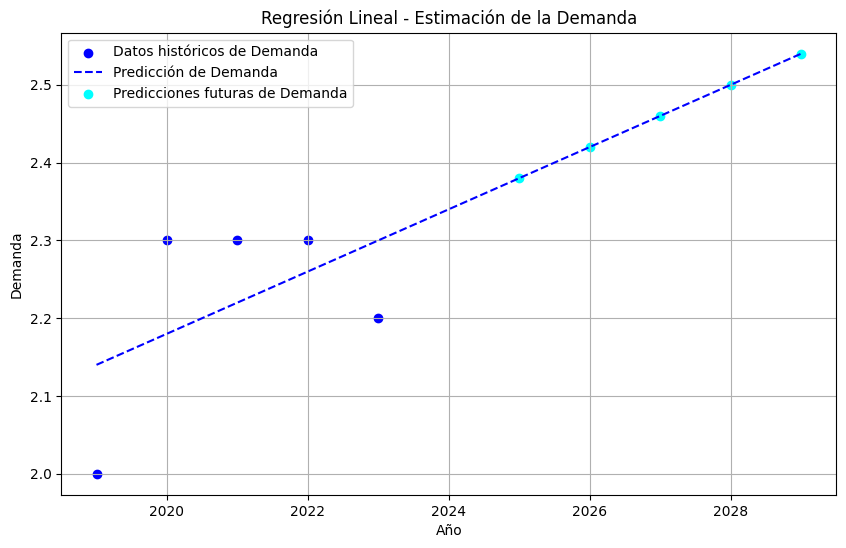

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


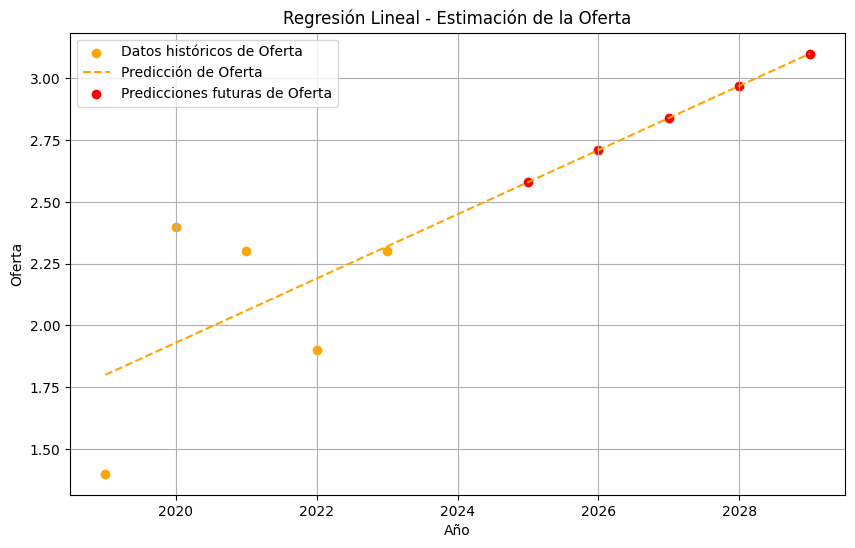

Predicciones para los años 2025-2029:

Demanda:
Año: 2025, Predicción de Demanda: 2.38
Año: 2026, Predicción de Demanda: 2.42
Año: 2027, Predicción de Demanda: 2.46
Año: 2028, Predicción de Demanda: 2.50
Año: 2029, Predicción de Demanda: 2.54

Oferta:
Año: 2025, Predicción de Oferta: 2.58
Año: 2026, Predicción de Oferta: 2.71
Año: 2027, Predicción de Oferta: 2.84
Año: 2028, Predicción de Oferta: 2.97
Año: 2029, Predicción de Oferta: 3.10


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = {
    "Año": [2019, 2020, 2021, 2022, 2023],
    "Demanda": [2.0, 2.3, 2.3, 2.3, 2.2],
    "Oferta": [1.4, 2.4, 2.3, 1.9, 2.3],
    "Demanda Insatisfecha": [-0.6, 0.1, 0.0, -0.4, 0.1],
}

df = pd.DataFrame(data)

X = df[["Año"]] 
y_demanda = df["Demanda"] 

model_demanda = LinearRegression()
model_demanda.fit(X, y_demanda)

y_oferta = df["Oferta"]  

model_oferta = LinearRegression()
model_oferta.fit(X, y_oferta)

años_futuros = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
predicciones_demanda = model_demanda.predict(años_futuros)
predicciones_oferta = model_oferta.predict(años_futuros)

# Gráfico de Demanda
plt.figure(figsize=(10, 6))
plt.scatter(df["Año"], df["Demanda"], color="blue", label="Datos históricos de Demanda")
plt.plot(np.append(df["Año"].values, años_futuros.flatten()), 
         model_demanda.predict(np.append(df["Año"].values.reshape(-1, 1), años_futuros, axis=0)), 
         color="blue", linestyle="--", label="Predicción de Demanda")
plt.scatter(años_futuros, predicciones_demanda, color="cyan", label="Predicciones futuras de Demanda")
plt.xlabel("Año")
plt.ylabel("Demanda")
plt.title("Regresión Lineal - Estimación de la Demanda")
plt.legend()
plt.grid()
plt.show()

# Gráfico de Oferta
plt.figure(figsize=(10, 6))
plt.scatter(df["Año"], df["Oferta"], color="orange", label="Datos históricos de Oferta")
plt.plot(np.append(df["Año"].values, años_futuros.flatten()), 
         model_oferta.predict(np.append(df["Año"].values.reshape(-1, 1), años_futuros, axis=0)), 
         color="orange", linestyle="--", label="Predicción de Oferta")
plt.scatter(años_futuros, predicciones_oferta, color="red", label="Predicciones futuras de Oferta")
plt.xlabel("Año")
plt.ylabel("Oferta")
plt.title("Regresión Lineal - Estimación de la Oferta")
plt.legend()
plt.grid()
plt.show()

# Mostrar predicciones para Demanda y Oferta
print("Predicciones para los años 2025-2029:")
print("\nDemanda:")
for año, pred in zip(años_futuros.flatten(), predicciones_demanda):
    print(f"Año: {año}, Predicción de Demanda: {pred:.2f}")

print("\nOferta:")
for año, pred in zip(años_futuros.flatten(), predicciones_oferta):
    print(f"Año: {año}, Predicción de Oferta: {pred:.2f}")
